In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## 1) 載入資料集

In [ ]:
# df_train = pd.read_csv('./data/Iris.csv')
df_train = pd.read_csv('https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02001_log_01.csv', sep='\t')
df_train = df_train.drop(labels=[r'收集日期', 
r'抽樣秒', 
r'位址區段E32768紀錄時間', 
r'位址區段G32768紀錄時間', 
r'位址區段G12288紀錄時間',
r'目前生產配方'],axis=1) # 移除Id
# df_train = pd.read_csv('https://github.com/tempzeba/iris-dnn-tensorflow/raw/master/data/Iris.csv')
# df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,壓力檢測啟動,入胚啟動,加熱啟動,吹瓶啟動,機台異常或無異常,自動或手動,總生產數量,Cycle_Time,低壓壓力,高壓壓力,回收壓力,預吹壓力,最多成型時間,第一穴預吹延遲,第二穴預吹延遲,第三穴預吹延遲,第四穴預吹延遲,第五穴預吹延遲,第六穴預吹延遲,第七穴預吹延遲,第八穴預吹延遲,第九穴預吹延遲,第十穴預吹延遲,第一穴高壓延遲,第二穴高壓延遲,第三穴高壓延遲,第四穴高壓延遲,第五穴高壓延遲,第六穴高壓延遲,第七穴高壓延遲,第八穴高壓延遲,第九穴高壓延遲,第十穴高壓延遲,第一穴吹高壓時間,第二穴吹高壓時間,第三穴吹高壓時間,第四穴吹高壓時間,第五穴吹高壓時間,第六穴吹高壓時間,第七穴吹高壓時間,...,第六層燈管加熱%,第七層燈管加熱%,第八層燈管加熱%,第九層燈管加熱%,第十層燈管加熱%,滾筒速度,產能,吹氣鼓風機轉速,吸氣鼓風機轉速,自轉馬達轉速,整列滾筒調速,牙口鼓風機轉速,入胚啟動位置,入胚啟動延時,震動馬達震動時間,震動馬達震動循環時間,第一穴壓力檢測,第二穴壓力檢測,第三穴壓力檢測,第四穴壓力檢測,第五穴壓力檢測,第六穴壓力檢測,第七穴壓力檢測,第八穴壓力檢測,第九穴壓力檢測,第十穴壓力檢測,破瓶壓力檢測值設定,加熱箱一水道溫度,加熱箱二水道溫度,加熱箱三水道溫度,加熱箱四水道溫度,加熱箱五水道溫度,加熱箱六水道溫度,加熱箱七水道溫度,加熱箱八水道溫度,機台編號,機台是否正常(0~59s),破瓶數量,異常代碼,破瓶數增加
0,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.4,33.5,11.4,11.2,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,23.8,24.6,24.3,24.8,24.3,24.4,25.1,25.2,0.0,39.0,1259.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.5,33.4,11.4,11.2,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,23.9,24.6,24.3,24.8,24.3,24.4,25.1,25.2,0.0,40.0,1259.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.6,33.4,11.3,11.1,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,23.9,24.6,24.4,24.8,24.3,24.5,25.3,25.2,0.0,42.0,1259.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.5,33.5,11.4,11.2,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,24.1,24.6,24.4,24.9,24.4,24.5,25.2,25.3,0.0,43.0,1259.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.5,33.6,11.4,11.3,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,24.1,24.8,24.4,24.9,24.4,24.6,25.3,25.3,0.0,44.0,1259.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99134,1.0,0.0,0.0,0.0,0.0,0.0,23763.0,2304.0,8.2,33.0,11.1,10.9,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,66.5,47.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,29.1,29.1,29.0,29.2,29.0,28.9,0.0,0.0,0.0,0.0,23.0,55.8,55.4,58.9,58.1,47.9,65.9,60.9,54.5,0.0,25.0,1330.0,0.0,0
99135,1.0,0.0,0.0,0.0,0.0,0.0,23763.0,2304.0,8.2,33.0,11.0,10.9,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,66.5,47.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,29.1,29.1,29.0,29.2,29.0,28.9,0.0,0.0,0.0,0.0,23.0,55.1,54.9,58.2,57.4,47.4,65.4,60.3,54.1,0.0,26.0,1330.0,0.0,0
99136,1.0,0.0,0.0,0.0,0.0,0.0,23763.0,2304.0,8.2,32.9,11.1,10.9,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,66.5,47.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,29.1,29.1,29.0,29.2,29.0,28.9,0.0,0.0,0.0,0.0,23.0,54.5,54.4,57.5,56.9,46.8,64.5,59.8,53.4,0

## 4) 將輸出特徵做one-hot encoding
如何對欄位class做one-hot encoding？
#### class 的值有0,1,2

In [55]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train[r'異常代碼'])
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 4) 切割訓練集與測試集

In [84]:
pd.set_option('max_row',300)
# X=df_train.drop(labels=['Class'],axis=1)
X=df_train.drop(columns=[r'異常代碼'])
# X.isna().sum().sum()
# X
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
壓力檢測啟動,99139.0,0.999556,0.021062,0.0,1.0,1.0,1.0,1.0
入胚啟動,99139.0,0.943836,0.230238,0.0,1.0,1.0,1.0,1.0
加熱啟動,99139.0,0.990155,0.098732,0.0,1.0,1.0,1.0,1.0
吹瓶啟動,99139.0,0.988945,0.104561,0.0,1.0,1.0,1.0,1.0
機台異常或無異常,99139.0,0.088048,0.283366,0.0,0.0,0.0,0.0,1.0
自動或手動,99139.0,0.993444,0.080706,0.0,1.0,1.0,1.0,1.0
總生產數量,99139.0,27608.455946,19077.618745,0.0,10927.5,23887.0,44805.0,65534.0
Cycle_Time,99139.0,2304.000000,0.000000,2304.0,2304.0,2304.0,2304.0,2304.0
低壓壓力,99139.0,8.192733,0.149145,7.8,8.1,8.2,8.3,8.8
高壓壓力,99139.0,30.657395,1.834288,21.9,29.0,31.2,32.1,33.9


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)

In [ ]:
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)
X_train

訓練資料:  (105, 4)
測試資料:  (45, 4)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
118,7.7,2.6,6.9,2.3
138,6.0,3.0,4.8,1.8
75,6.6,3.0,4.4,1.4
37,4.9,3.1,1.5,0.1
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


## 5) 建立網路模型

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [ ]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()
model.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model.add(Dense(16, Activation('relu')))
model.add(Dense(3, Activation('softmax')))

In [ ]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1
epochs = 50

# 訓練模型
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/50
94/94 [==============================] - 0s 3ms/step - loss: 0.8920 - acc: 0.6277 - val_loss: 0.8789 - val_acc: 0.3636
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6132 - acc: 0.7447 - val_loss: 0.6775 - val_acc: 0.6364
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4686 - acc: 0.8511 - val_loss: 0.5076 - val_acc: 0.9091
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3853 - acc: 0.9362 - val_loss: 0.4197 - val_acc: 0.9091
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3331 - acc: 0.9574 - val_loss: 0.3655 - val_acc: 0.9091
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.2873 - acc: 0.9787 - val_loss: 0.4707 - val_acc: 0.6364
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.2611 - acc: 0.9255 - val_loss: 0.2076 - val_acc: 1.0000
Epoch 8/50
94/94 [==============================] - 0s 1ms/step - loss: 0.2263 - acc: 0.97

## 6) 觀察訓練結果

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

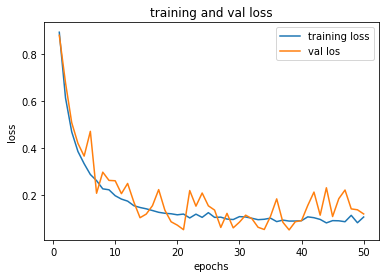

In [ ]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

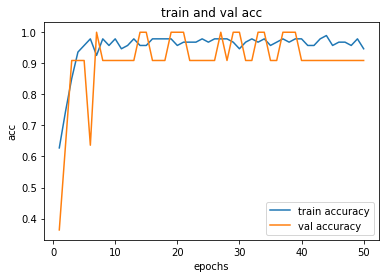

In [ ]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 測試

In [ ]:
from sklearn.metrics import accuracy_score
label=np.argmax(y,axis=1)
pred =  np.argmax(model.predict(X), axis=1)
print(accuracy_score(label, pred))

0.9733333333333334
